In [1]:
from pathlib import Path
import numpy as np
import os
from matplotlib import pyplot as plt
import matplotlib as mpl

%matplotlib inline
np.seterr(all='warn')
textwidth = 6.268
mpl.rcParams['figure.dpi'] = 70
default_figargs = dict(figsize = (textwidth,textwidth))

import logging
mpl_logger = logging.getLogger('matplotlib')
mpl_logger.setLevel(logging.WARNING) 

In [2]:
this_run = Path('/data/users/tch14/slurm_runs/89173')
print(f'looking in {this_run}')

datafiles = sorted([(int(f.stem), f) for f in this_run.iterdir() if f.name.endswith('npz') and not f.name == 'parameters.npz'])
jobs = np.array([j_id for j_id, f in datafiles])
#print([d.stem for i,d in datafiles])
print(f'job ids range from {min(jobs)} to {max(jobs)}')
print(f'missing jobs: {set(range(max(jobs))) - set(jobs)}')

looking in /data/users/tch14/slurm_runs/89173
job ids range from 0 to 199
missing jobs: set()


In [8]:
%%time
print(f'Loading the files from disk lazily')
ds = [np.load(f, allow_pickle = True) for i,f in datafiles[:20]]

Loading the files from disk lazily
CPU times: user 0 ns, sys: 20 ms, total: 20 ms
Wall time: 247 ms


In [9]:
%%time
betas = np.array([d['parameters'][()]['beta'] for d in ds])
llogs = [d['logs'][()] for d in ds]
betas

Ns = ds[0]['Ns'][()]

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 15.5 µs


In [6]:
1/betas

array([1.        , 1.00502513, 1.01005025, 1.01507538, 1.0201005 ,
       1.02512563, 1.03015075, 1.03517588, 1.04020101, 1.04522613])

In [17]:
log = logs[5]
print([key for key in dir(log) if not key.startswith('_')])

['A', 'Fc', 'Ff', 'IPRs', 'Mf_moments', 'N_cumulants', 'N_sites', 'N_steps', 'Nc', 'Nf', 'accept_rates', 'classical_accept_rates', 'eigenval_bins', 'eigenvals', 'last_state', 'powers', 'proposal_rates', 'return_vals', 'start', 'state', 'time', 'update']


[(0.8, 1.0), (0.5, 1.5)]

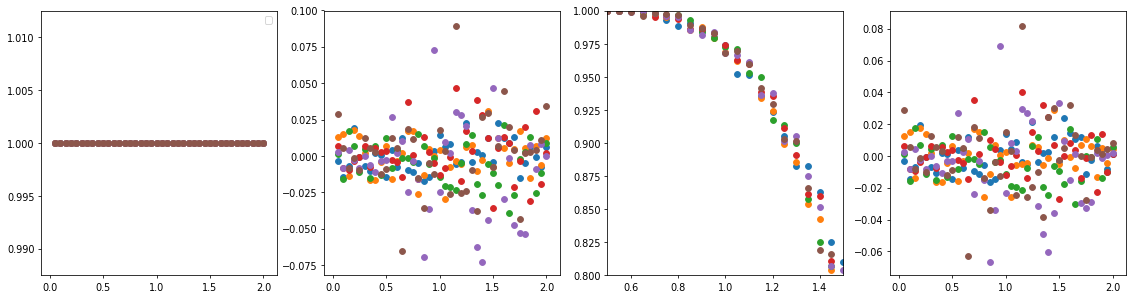

In [13]:
from FKMC.general import running_mean
f, axes = plt.subplots(1,4, figsize = (20,5))

Mfs = np.array([[log.Mf_moments for log in logs] for logs in llogs])

for j in range(4):
    for i,N in enumerate(Ns):
            y = np.mean(Mfs[:, i, j], axis = -1)
            axes[j].scatter(1/betas, y)
axes[0].legend()
axes[2].set(xlim = (0.5,1.5), ylim = (0.8,1.0))